# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
apple = pd.read_csv(r'..\data\general_dfs\appl_1980_2014.csv')
apple.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.8,93.92,95.35,65130000,95.35


### Step 3. Assign it to a variable apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close']

In [6]:
apple.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close'], dtype='object')

In [8]:
convert = lambda e: pd.to_datetime(e, format='%Y-%m-%d')

In [9]:
apple.date = apple.date.apply(convert)  

In [12]:
apple.date

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: date, Length: 8465, dtype: datetime64[ns]

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [13]:
apple = apple.set_index('date')

### Step 7.  Is there any duplicate dates?

In [18]:
apple.index.is_unique

True

In [36]:
# NO! All are unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [23]:
apple = apple.sort_index(ascending=True)

### Step 9. Get the last business day of each month

In [50]:
df = apple.resample("M", how= sum)
df

,open,high,low,close,volume,adj_close
date,,,,,,
1980-12-31,396.26,397.38,395.76,395.76,336212800,6.15
1981-01-31,666.85,668.36,664.75,664.75,152247200,10.37
1981-02-28,503.12,504.87,501.75,501.75,80404800,7.81
1981-03-31,548.63,550.37,546.40,546.40,175179200,8.53
1981-04-30,573.02,574.73,571.77,571.77,134232000,8.89
...,...,...,...,...,...,...
2014-03-31,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75
2014-04-30,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21
2014-05-31,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6392000,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [46]:
(apple.index[-1] - apple.index[1]).days

12258

12261

### Step 11.  How many months in the data we have?

In [51]:
len(df.index)

404

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

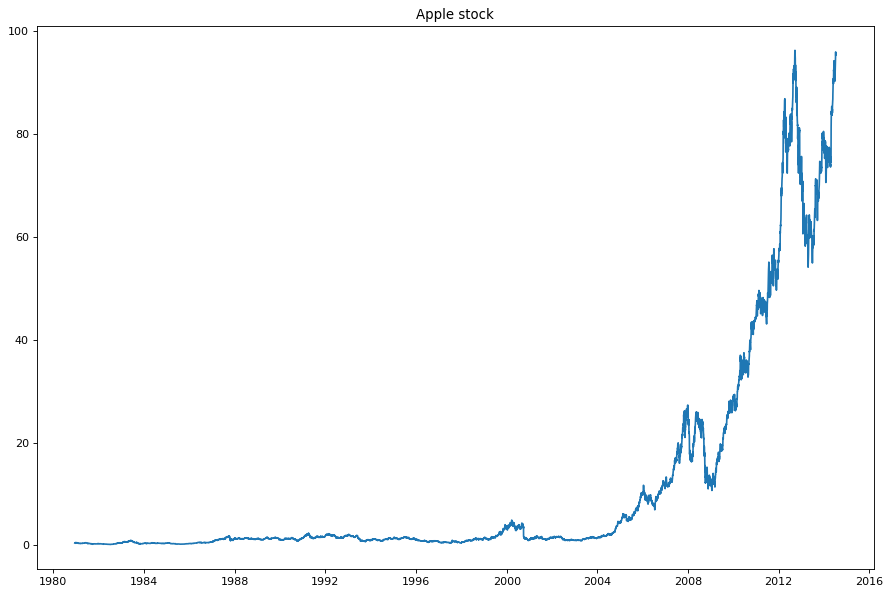

In [56]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13.5, 9), dpi=80, facecolor='w', edgecolor='k')
plt.title('Apple stock')
ax = plt.plot(apple.adj_close)

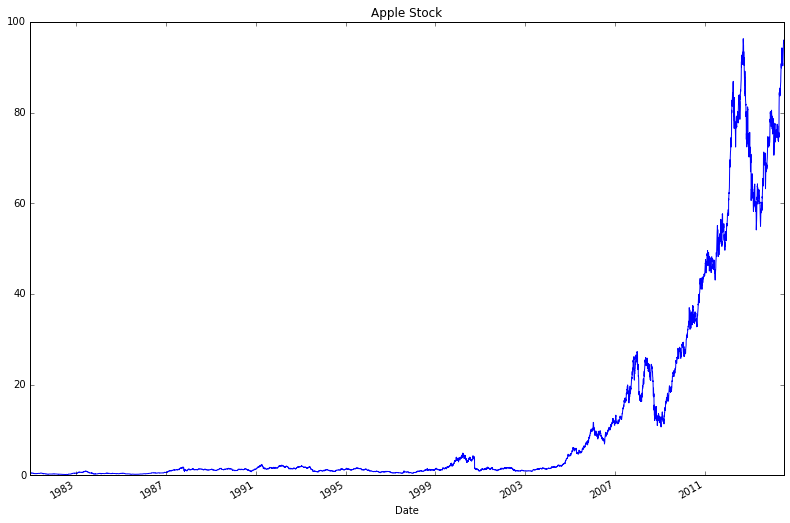

### BONUS: Create your own question and answer it.